In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np

In [3]:
glass = pd.read_csv("C:\\Users\\Nik\\Downloads\\glass.csv")

In [4]:
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
#how many unique values are there
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
# Training and Test data using 
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2) # 0.2 => 20 percent of entire data 
x_train = train.iloc[:,0:9]
y_train=train.iloc[:,9]

In [9]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC


In [11]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

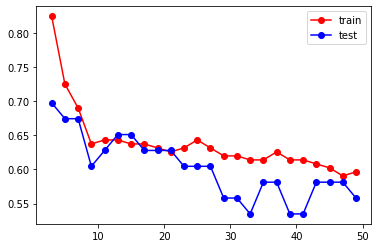

In [13]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")#bo is blue


plt.legend(["train","test"])
plt.show()

process to zoom starting 10 points so that we can see clearly from where to decide k value .same like elbow curve

In [15]:
# creating empty list variable 
acc1 = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,12,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc1 = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc1 = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc1.append([train_acc1,test_acc1])

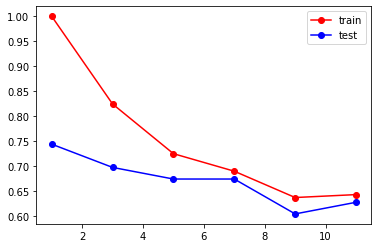

In [16]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,12,2),[i[0] for i in acc1],"ro-")

# test accuracy plot
plt.plot(np.arange(1,12,2),[i[1] for i in acc1],"bo-")


plt.legend(["train","test"])
plt.show()

In [20]:
# for 5 nearest neighbours
neigh = KNC(n_neighbors=7)

# fitting with training data
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
x_train = train.iloc[:,0:9]
y_train= train.iloc[:,9]
y_pred= neigh.predict(x_train)
# train accuracy 
train_acc = np.mean(y_pred==y_train)
print(train_acc)

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
print(test_acc)

0.6900584795321637
0.6744186046511628
